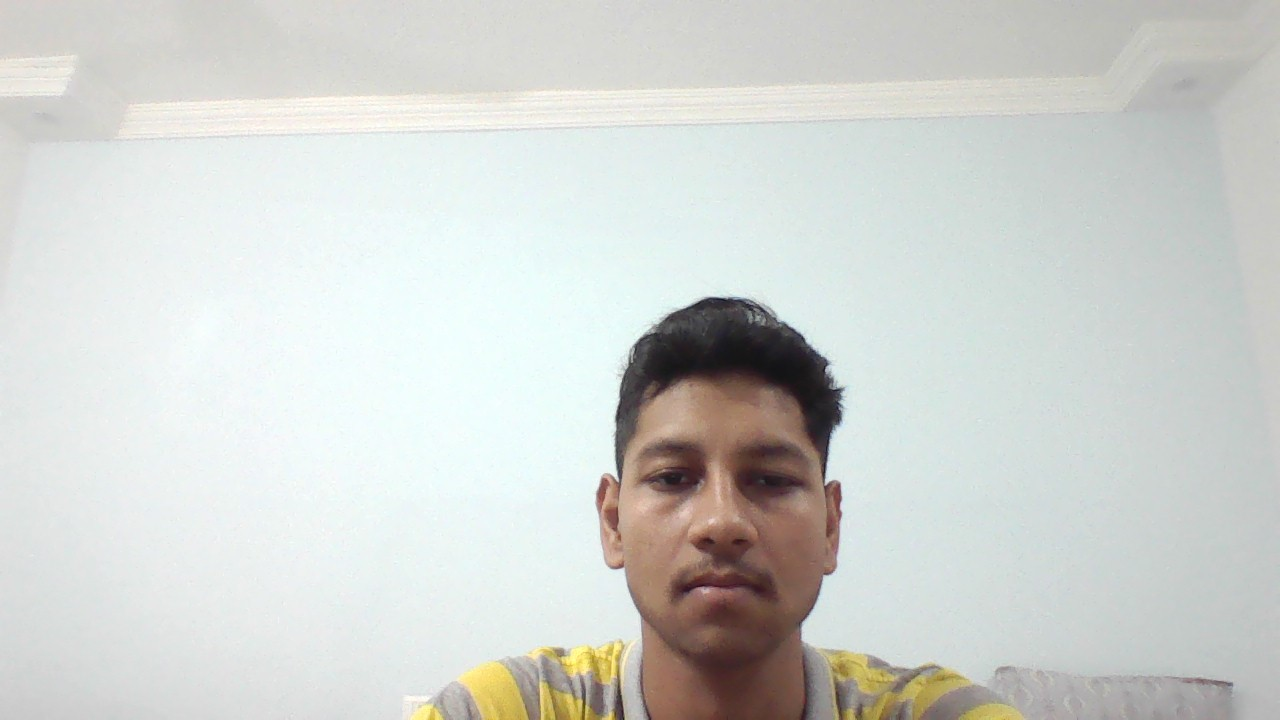

In [ ]:
import cv2
import tkinter as tk
from tkinter import filedialog
from google.colab.patches import cv2_imshow


def display_image(image_path):
    if image_path:
        img = cv2.imread(image_path)
        cv2_imshow(img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No image selected!")

if __name__ == "__main__":
    img_path = "/content/drive/MyDrive/dataset deep fake/t/a.jpg"
    display_image(img_path)

In [2]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatibl

In [3]:
#importing the neccessary libraries and modules
import warnings
warnings.filterwarnings("ignore")

import gc #for garbage collection
import numpy as np
import pandas as pd
import itertools #for iterators and looping
from collections import Counter #for counting elements
import  matplotlib.pyplot as plt #visualiztion
from sklearn.metrics import accuracy_score , roc_auc_score , confusion_matrix , classification_report,f1_score

#import custom module and classes
from imblearn.over_sampling import RandomOverSampler
import accelerate
import evaluate
from datasets import Dataset , Image , ClassLabel
from transformers import  (
    TrainingArguments , Trainer , ViTImageProcessor , ViTForImageClassification
    , DefaultDataCollator )#procreesor for processing ,classify with vit model,for collecting data in a deafault way
import torch #import pytorch for deep learning
from torch.utils.data import DataLoader # create the data loader
from torchvision.transforms import (
    CenterCrop,#Center crop an image
    Compose, # Compose multiple image transformations
    Normalize,#normLIZE THE image pixel values
    RandomRotation, # Apply random rotaions to images
    RandomResizedCrop, # crop and resize images randomly
    RandomHorizontalFlip,#apply randomhorizontal flip
    RandomAdjustSharpness,#adjust sharpness
    Resize,
    ToTensor
)

In [4]:
# python imaging librarari
from PIL import ImageFile
#Enable the option  to load truncsted images.
#this setting allows the pil library to attempt
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manjilkarki/deepfake-and-real-images")

print("Path to dataset files:", path)

100%|██████████| 1.68G/1.68G [01:11<00:00, 25.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the dataset directory
data_dir = "/root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1"

# Function to get all image file paths
def get_image_paths(directory):
    image_extensions = {".jpg", ".jpeg", ".png", ".bmp"}  # Supported image formats
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Function to display images


# Get image paths and display some images
image_paths =list(get_image_paths(data_dir))# used fomaking final dict
print(image_paths[0])
label_kg = []
fi_name_kg = image_paths
for i_p in image_paths:
  k = i_p.split('/')
  c = k[len(k)-2].lower()
  label_kg.append(c)








/root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test/Real/real_3750.jpg


In [ ]:
print(len(label_kg),len(fi_name_kg))

190335 190335


In [ ]:
#importing the neccessary libraries
image_dict = {}
from pathlib import Path
from tqdm import tqdm
import os
#initialize empty list
fake_file_names_tr= []
fake_labels_tr = []
import os

def extract_labels_filename(folder_path):
    labels = []
    filenam = []
    # Supported image file extensions
    ext = '.jpg'

    # Iterate through files in the given folder
    for filename in os.listdir(folder_path):
       # if filename.endswith(ext) :
            filepath = os.path.join(folder_path, filename)
            b = filepath.split('/')
            label = b[len(b)-2]
            labels.append(label)

            filenam.append(filepath)
    return labels,filenam

# Example usage
fake_folder_path_tr = "/content/drive/MyDrive/dataset deep fake/train-20250112T065955Z-001/train/fake"  # Change this to your actual folder path
fake_labels_tr,fake_file_name_tr = extract_labels_filename(fake_folder_path_tr)
print(len(fake_file_name_tr))

real_folder_path_tr ="/content/drive/MyDrive/dataset deep fake/train-20250112T065955Z-001/train/real"
real_labels_tr,real_file_name_tr = extract_labels_filename(real_folder_path_tr)
#final tr label and filename
#print(real_labels_tr)
#combining trININ and testing
fake_folder_path_te = "/content/drive/MyDrive/dataset deep fake/test-20250112T065939Z-001/test/fake"  # Change this to your actual folder path
fake_labels_te,fake_file_name_te = extract_labels_filename(fake_folder_path_te)
print(len(fake_file_name_te))

real_folder_path_te ="/content/drive/MyDrive/dataset deep fake/test-20250112T065939Z-001/test/real"
real_labels_te,real_file_name_te = extract_labels_filename(real_folder_path_te)




labels_tr = fake_labels_tr + real_labels_tr + real_labels_te + fake_labels_te +label_kg

file_name_tr = fake_file_name_tr +real_file_name_tr + real_file_name_te + fake_file_name_te +fi_name_kg
#print(labels)


print(len(labels_tr),len(file_name_tr))
#dataframe with our dictionaries
df = pd.DataFrame.from_dict({"image" : file_name_tr , "label": labels_tr })
print(df.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset deep fake/train-20250112T065955Z-001/train/fake'

In [ ]:
df['label'].unique()

array(['fake', 'real'], dtype=object)

In [ ]:
y = df[['label']]

In [ ]:

df = df.drop(columns=['label'])

In [ ]:
# random over sampling of minority class


ros = RandomOverSampler(random_state=83)
df,y_resampled = ros.fit_resample(df,y)
df['label'] = y_resampled

del y
gc.collect()


In [ ]:
print(df.head(),df.shape)

                                               image label
0  /content/drive/MyDrive/dataset deep fake/train...  fake
1  /content/drive/MyDrive/dataset deep fake/train...  fake
2  /content/drive/MyDrive/dataset deep fake/train...  fake
3  /content/drive/MyDrive/dataset deep fake/train...  fake
4  /content/drive/MyDrive/dataset deep fake/train...  fake (191352, 2)


In [ ]:
#create a dataset from panda dataframe
#converts a pandas dataframe to a hugging face dataset

# Converts a pandas dataframe to a hugging face  dataset
#for preprocessing training and
# cast the image column to image datatype
#the imgae() feature  type allows the hugging face dataset libraries  to handle column as data
#for ml it is good for loading preprocessing which is optimized
dataset = Dataset.from_pandas(df).cast_column("image",Image())

In [ ]:
dataset[400]["image"]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# create a list of unique labels by converting 'labels  to a set and then back to list
label_list =['real','fake']
# initialize the empty dictionaries to map label to ids and vice versa
label2id , id2label = dict() , dict()
#iterate over each label and assingn  each label an ID and vice versa
for i, label in enumerate(label_list):
  label2id[label] = i #map the labael to the corresponding id
  id2label[i] =label

print("Mapping of ids to labels : ",id2label,'\n')
print("Mapping of labels to id ",label2id)


In [ ]:
#creating classlabels to match labels and ids
ClassLabels= ClassLabel(num_classes = len(label_list), names = label_list)
def  map_label2id(da):
  da['label'] = ClassLabels.str2int(da['label'])
  return da
#casting label to column
dataset = dataset.map(map_label2id,batched = True)
#casting the columnn to classlabel object
dataset = dataset.cast_column('label', ClassLabels)


In [ ]:
dataset = dataset.train_test_split(test_size = 0.2,shuffle=True, stratify_by_column = 'label')
#train
train_data = dataset['train']
test_data = dataset['test']


In [ ]:
#setting up the model
model_str = "dima806/deepfake_vs_real_image_detection"
#create the processor for vit model
processor = ViTImageProcessor.from_pretrained(model_str)
#get the imge mean, sd for normalizing
image_mean,image_std = processor.image_mean , processor.image_std
size  = processor.size["height"]
print("size:" , size)


In [ ]:
#ddefine noemalization transformaation for the input images
normalize = Normalize(mean = image_mean, std = image_std)
#set of transformations oon training data
_train_transforms = Compose(
    [
        Resize((size,size)),
        RandomRotation(90),
        RandomAdjustSharpness(2),
        ToTensor(),
        normalize
    ]
)
#transformations on test data
_val_transforms = Compose(
    [
        Resize((size,size)),
        ToTensor(),
        normalize
    ]
)
#define function to apply training transformations to a batch of examples
def train_transforms(ex):
  ex['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in ex["image"] ]
  return ex

def val_transforms(ex):
  ex['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in ex["image"] ]
  return ex




In [ ]:
#set the transforms for the training data
train_data.set_transform(train_transforms)
#Set the transforms for the test/validation
test_data.set_transform(val_transforms)


In [ ]:
#the function which prepare the  batched data for training
def collate_fn(examples):
  # stack the pixel values from individual example into a single tensor .
  pixel_values = torch.stack([example["pixel_values"] for example in examples if "pixel_values" in example]) # Check if key exists

  #convert the label strings in examples to corresponding ids using label2id dictionary
  labels = torch.tensor([example['label'] for example in examples if 'label' in example]) #Check if key exists

  #return a dictionary containing batched pixel values and labels
  return {"pixel_values": pixel_values, "labels": labels}




In [ ]:
#loading the model
model = ViTForImageClassification.from_pretrained(model_str , num_labels = len(label_list) )

#configure the mapping of class labels to their corresponding indices for latter refrence
model.config.id2label = id2label
model.config.label2id = label2id
# number params calc
print(model.num_parameters(only_trainable = True) / 1e6)



In [ ]:
#Load the accuracy metrics from module named 'evaluate
accuracy = evaluate.load("accuracy")
# def computing_metrics for calculating evaluation metrics
def computing_metrics(eval_pred) :
  predictions = eval_pred.predictions
  #extract the true labels from the evaluation
  label_ids = eval_pred.label_ids
  ##calc accuray using the loaded accuracy ,etric
  #convert model predictions to class labels  by selecting the class with highest probabibilty
  predicted_labels = predictions.argmax(axis = 1)
  # calculate accuracy score by predicted labels to true labels
  acc_score = accuracy.compute(predictions = predicted_labels , references = label_ids)['accuracy']
  # return dict containing accuracy
  return {
      "accuracy" : acc_score
  }



In [ ]:
# name evaluation metrics that to be used at time of evaluation
metric_name = "accuracy"
#define the name of the model
model_name = "deepfake_vs_real_image_detection"
#epoch to train
num_train_epochs = 1
# create an indstance of training arguments to configure training stteing
args = TrainingArguments(
    #directoriy for saving the checkpoints
    output_dir = model_name,
    #logging save logs
    logging_dir='./logs',
    #evaluation strategy that have been performed after  each epoch
    evaluation_strategy = "epoch",
    #set the learniing rate for optimizer
    learning_rate = 1e-6,
    #define the bacth size
    per_device_train_batch_size = 32,
    #to define batch size for evaluation on each device .
    per_device_eval_batch_size = 8,
    #specify the total number of training epochs
    num_train_epochs = num_train_epochs,
    #apply weight  decay to prevent overfitting
    weight_decay = 0.02,
    #set the number of warmup steps  for the learning rate scheduler
    warmup_steps = 50,
    #disable the removal of unused columns
    remove_unused_columns = False,
    #Define the strategy for saving model for saving the  checkpoints to save space
    save_strategy = 'epoch',
    #load the best model at the end of training
    load_best_model_at_end = True,
    #limit the total number of saved checkpoints to save space
    save_total_limit = 1,
    #specify the training progress should not be reported
    report_to = "none"



)

In [ ]:
#create a trainer instance for finetuning a language model
#model : the pretrained model to be fine tuned
# args :configuration settiings and hyperparameters for trAining
#eval_dataset :data used for modelling
#data_collator : a function for computinng custom evaluation metrics
#compute metrics :  a function computing evaluation meetrics
#tokenuizer : The tokenizer used for processing text

trainer = Trainer(
    model,
    args,
    train_dataset = train_data,
    eval_dataset = test_data,
    data_collator = collate_fn,
    compute_metrics = computing_metrics,
    tokenizer = processor

)


In [ ]:
trainer.train()

In [ ]:
trai